✅ Dataset Loaded Successfully!

Dataset Preview:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0   

✅ Encoding Done!

   Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0        90  2014           3.35           5.59       27000          2   
1        93  2013           4.75           9.54       43000          1   
2        68  2017           7.25           9.85       

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


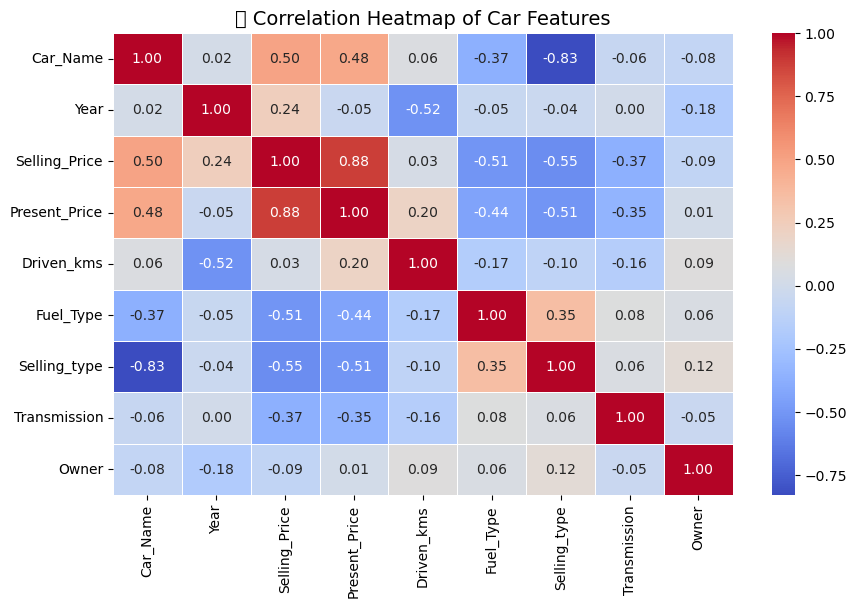

📊 Linear Regression R2 Score: 0.8464540623821867
🌲 Random Forest R2 Score: 0.9660248711535068 



C:\Users\Varsha\AppData\Local\Temp\ipykernel_8536\4074923717.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


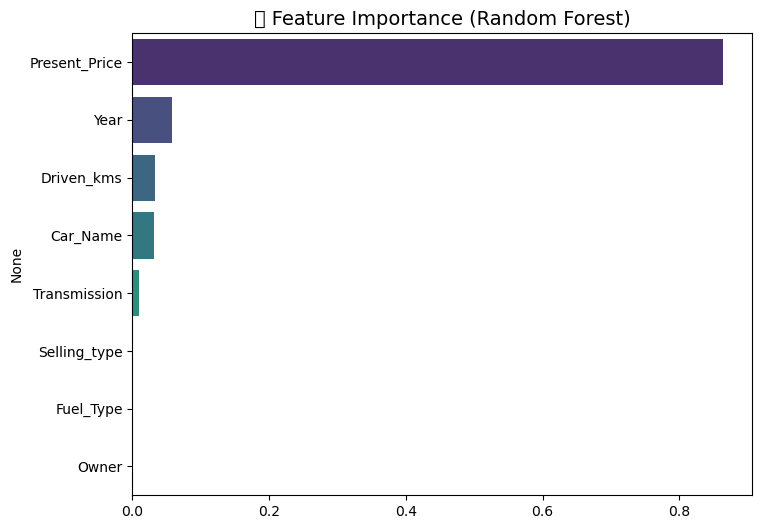

🚗 Example Prediction:
🔹 Predicted Price (Linear Regression): 2.97 lakhs
🔹 Predicted Price (Random Forest): 0.44 lakhs


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [13]:
# ======================================================
# 🚗 Car Price Prediction - Machine Learning Project
# ======================================================

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# ======================================================
# 2. Load Dataset
# ======================================================
csv_path = "car data.csv"   # Make sure "car data.csv" is in the same folder
df = pd.read_csv(csv_path)

print("✅ Dataset Loaded Successfully!\n")
print("Dataset Preview:")
print(df.head(), "\n")

# ======================================================
# 3. Data Preprocessing
# ======================================================
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

print("✅ Encoding Done!\n")
print(df_encoded.head(), "\n")

# ======================================================
# 4. Correlation Heatmap
# ======================================================
plt.figure(figsize=(10, 6))
corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("🔥 Correlation Heatmap of Car Features", fontsize=14)
plt.show()

# ======================================================
# 5. Train/Test Split
# ======================================================
X = df_encoded.drop("Selling_Price", axis=1)
y = df_encoded["Selling_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================================================
# 6. Model Training
# ======================================================
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# ======================================================
# 7. Model Evaluation
# ======================================================
print("📊 Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("🌲 Random Forest R2 Score:", r2_score(y_test, y_pred_rf), "\n")

# ======================================================
# 8. Feature Importance (Random Forest)
# ======================================================
importances = rf_reg.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("⭐ Feature Importance (Random Forest)", fontsize=14)
plt.show()

# ======================================================
# 9. Example Prediction
# ======================================================
sample_data = X_test.iloc[0].values.reshape(1, -1)
pred_lr = lin_reg.predict(sample_data)[0]
pred_rf = rf_reg.predict(sample_data)[0]

print("🚗 Example Prediction:")
print("🔹 Predicted Price (Linear Regression): {:.2f} lakhs".format(pred_lr))
print("🔹 Predicted Price (Random Forest): {:.2f} lakhs".format(pred_rf))
